# Spiral table

<IPython.core.display.Javascript object>


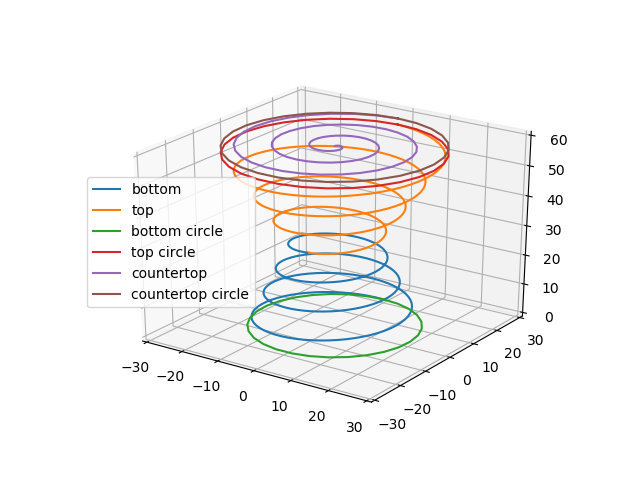

In [13]:
#linear spiral radius changes

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# parameters
# spiral node points [height, radius], cm
p0 = [0,  20] # bottom 
p1 = [29, 10] # middle
p2 = [58, 25] # top
p3 = [60, 25] # countertop

# number of turns of spiral
turns = 7

# spiral turn direction. 1 = clockwise, -1 = counterclockwise
direction = -1

#image precision. number of points on graph per one turn of the spiral
resolution = 30 #30 - ok


# calculation. parametric curves
# line linear equation y=mx+b by two points
def lineq(p1, p2):
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    b = p2[1] - (m * p2[0])
    return m, b

# calculate linear equations of radius change for spirals
# bottom spiral tangent between points p0 and p1
l1 = lineq(p0, p1) 
# top spiral tangent between points p1 and p2
l2 = lineq(p1, p2)

zscale = turns * 2*np.pi / (p2[0] - p0[0])
theta = np.linspace(0, 2 * np.pi, resolution)
theta3 = np.linspace(0, 6 * np.pi, 3*resolution)

# bottom spiral
z0 = np.linspace(p0[0], p1[0], turns * resolution)
x0 = (l1[0] * z0 + l1[1]) * direction * np.sin(zscale * z0)
y0 = (l1[0] * z0 + l1[1]) * np.cos(zscale * z0)

# top spiral
z1 = np.linspace(p1[0],p2[0], turns * resolution)
x1 = (l2[0] * z1 + l2[1]) * direction * np.sin(zscale * z1)
y1 = (l2[0] * z1 + l2[1]) * np.cos(zscale * z1)

# bottom circle
z2 = np.empty(resolution)
z2.fill(p0[0])
x2 = p0[1] * np.sin(theta)
y2 = p0[1] * np.cos(theta)

# top circle
z3 = np.empty(resolution)
z3.fill(p2[0])
x3 = p2[1] * np.sin(theta)
y3 = p2[1] * np.cos(theta)

#countertop
z4 = np.empty(3*resolution)
z4.fill(p3[0])
r = theta3 / (6 * np.pi)
x4 = r * p3[1] * np.sin(theta3)
y4 = r * p3[1] * np.cos(theta3)

# countertop circle
z5 = np.empty(resolution)
z5.fill(p3[0])
x5 = p3[1] * np.sin(theta)
y5 = p3[1] * np.cos(theta)

#graph
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.plot(x0, y0, z0, label = 'bottom')
ax.plot(x1, y1, z1, label = 'top')
ax.plot(x2, y2, z2, label = 'bottom circle')
ax.plot(x3, y3, z3, label = 'top circle')
ax.plot(x4, y4, z4, label = 'countertop')
ax.plot(x5, y5, z5, label = 'countertop circle')

ax.set_xlim3d(-p3[0]/2, p3[0]/2)
ax.set_ylim3d(-p3[0]/2, p3[0]/2)
ax.set_zlim3d(p0[0], p3[0])

ax.legend()
plt.show()